# Computional methods for nanosystems
## Final project 
### Dot-Ring Nanostructure:wave-function engineering
#### Mateusz Siemiski

## Imported libraries

In [1]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.constants import physical_constants
import matplotlib.pyplot as plt
from ipywidgets import interact,interactive
from math import sqrt

import matplotlib.gridspec as gridspec
from IPython.display import display

## Physical constants

In [2]:
h_bar = physical_constants['Planck constant over 2 pi'][0]   
m_el = physical_constants['electron mass'][0]         
eV_unit = physical_constants['electron volt'][0]             
el_charge = physical_constants['elementary charge'][0]    
hh = physical_constants['Planck constant'][0]  
eV_J = physical_constants['electron volt'][0]

## Basic system's parameteres

In [3]:
m_ef = 0.067 * m_el
a_unit = 2 * 10**(-9)  
t_unit_J = h_bar**(2)/(2*m_ef*a_unit**2)  
t = t_unit_J/eV_unit

print("t=",t)
L = 60 #sites number
r0=L
rB=0.5*r0

V0=20   #inner barier energy
V1=90   #
VQR=0  #energy of the circle

N = 2000
VQD=0
VQDmin = VQR
VQDmax = V0# to create flat area
VQDtab = np.linspace(VQDmin, VQDmax, N)
EF=0.06

print("RB ",rB)

t= 0.1421635070391774
RB  30.0


## Functions that calculate potential energy

In [4]:
def V_pot(site,VQD): #potential energy calculation
    x,y=site.pos
    r=np.sqrt(x**2+y**2)
    return 4*t+barier(r,VQD)

def V_pot_t(x,y,VQD): #potential energy calculation function which plot 1D system  
    r=np.sqrt(x**2+y**2)
    return barier(r,VQD)

def barier(r,VQD): #calculate bariers energy and shape
    if(r<=rB):
        return  VQD+(V0-VQD)*np.exp(-0.018*(r-rB)**2)        
    elif(r>rB):
        return V1*(1-np.exp(-(r/r0)**30))+V0 *(np.exp(-0.018*(r-rB)**2))

def shape(pos): #it returns true if x,y is in the circle
    x,y=pos
    return ((x**2 + y**2) < ((r0)**2)) 

## System building

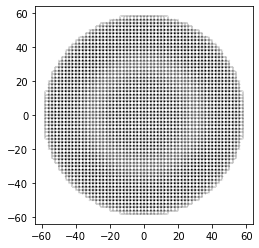

In [5]:
sys = kwant.Builder()
lat = kwant.lattice.square(a_unit*10**9, norbs=1)
sys[lat.shape(shape,(0,0))]=V_pot
sys[lat.neighbors()] =-t


sysf = sys.finalized()

kwant.plot(sysf,site_color = lambda site: sysf.hamiltonian(site,site,params=dict(VQD=2)),colorbar=False);

## Calculate Hamiltonian 

In [6]:
def hamiltonian_VQD(VQD):
    ene, v =np.linalg.eigh(sysf.hamiltonian_submatrix(params=dict(VQD=VQD)))
    return ene,v

## Plotering functions 

In [41]:
x=70
xnp=600
X0=np.linspace(-x,x,xnp)
V=np.zeros(xnp)

def plot_V(j=0):
    print(VQDtab[j])
    for i in range (xnp):
        V[i] = V_pot_t(X0[i],0,VQDtab[j])
    plt.plot(X0,V);
    kwant.plotter.map(sys,lambda s: V_pot(s,VQDtab[j]));
    
def calculate_system(VQD):
    ene,v=hamiltonian_VQD(VQDtab[VQD])
    for i in range (xnp):
        V[i] = V_pot_t(X0[i],0,VQDtab[VQD])
    plt.plot(X0,V);
    kwant.plotter.map(sys,lambda s: V_pot(s,VQDtab[VQD]));
    print("VQD = ", VQDtab[VQD], "meV")
    return ene,v,VQD
    
def plot_wf(energy):
    kwant.plotter.map(sysf,(abs(v[:,energy]))**2);
    print("E = ", ene[energy], "eV")
    print("VQD = ", VQDtab[VQD], "meV")
    frequency=((ene[energy]-ene[energy-1])*el_charge)//hh
    print("Frequency = ", frequency/1000000000, "GHz")
   

    

    



## System shape 

In [8]:
interact(plot_V, j=(0,N-1));

interactive(children=(IntSlider(value=0, description='j', max=1999), Output()), _dom_classes=('widget-interact…

## Electronic density

In [30]:
w=interactive(calculate_system, VQD=(0, N));
display(w)

interactive(children=(IntSlider(value=1000, description='VQD', max=2000), Output()), _dom_classes=('widget-int…

In [33]:
ene=w.result[0]
v=w.result[1]
VQD=w.result[2]

In [42]:
interact(plot_wf,energy=(0,N),VQD=VQD);

interactive(children=(IntSlider(value=1000, description='energy', max=2000), Output()), _dom_classes=('widget-…

# Results

After building the system, a simulation was performed, below are the results for selected VQD values.

## 1 VQD=0

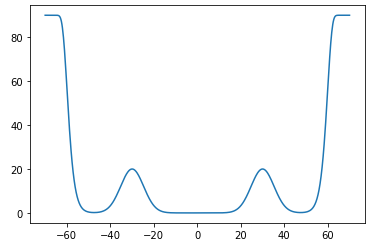 
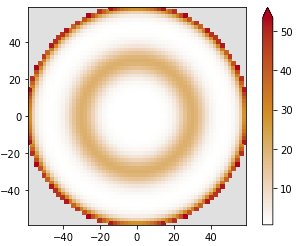

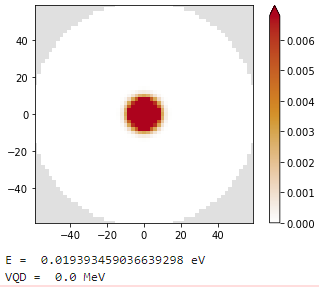

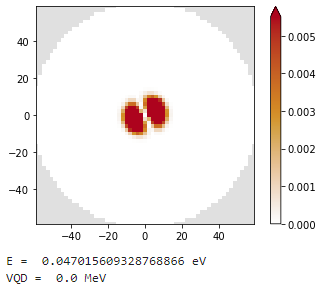
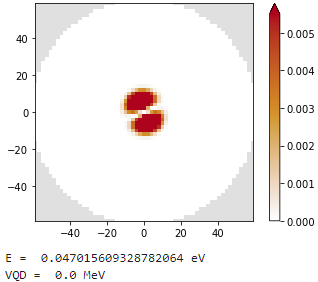

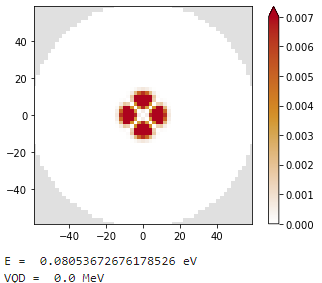
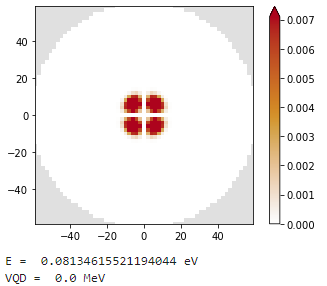

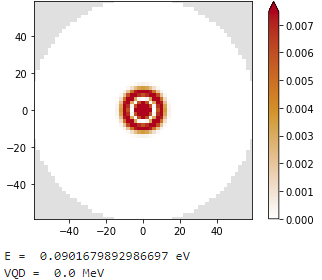

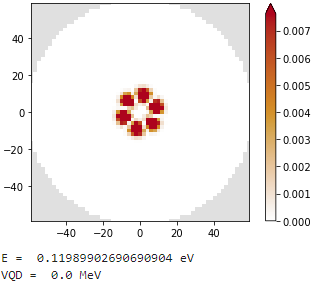
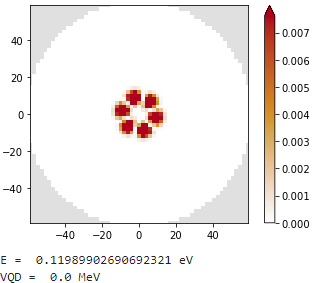

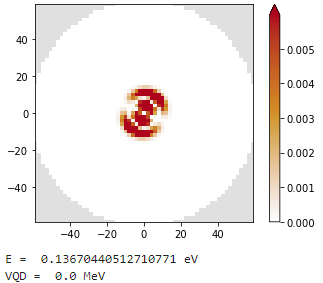
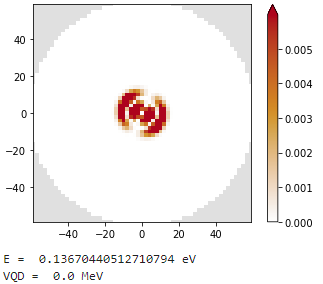

## 2 VQD=2,22

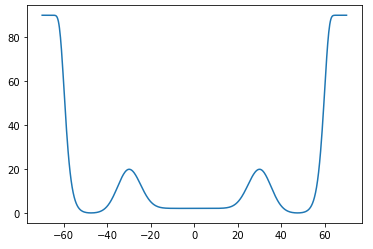
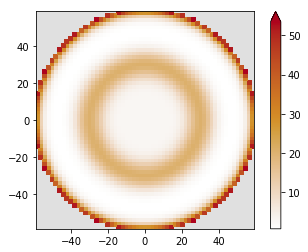

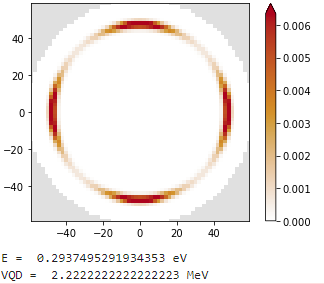

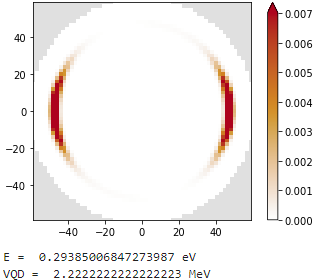
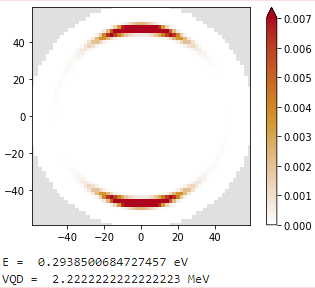

## 3 VQD=4,44

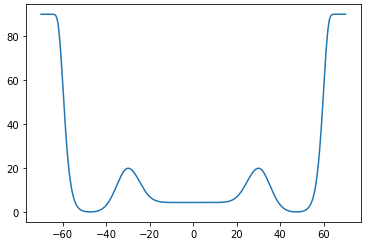
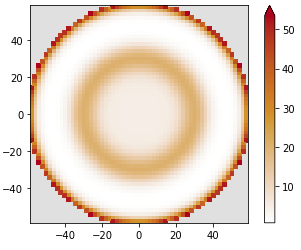

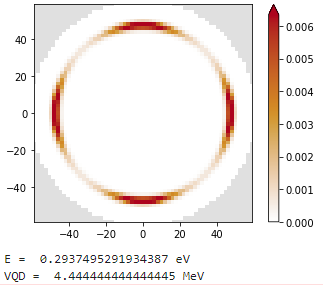

# Transition energy
Below are the results for the energy at which electron starts to localize inside the ring.

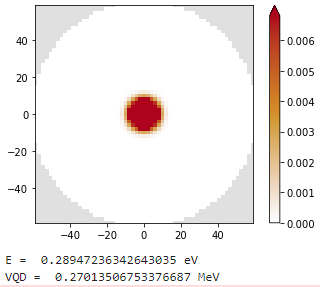
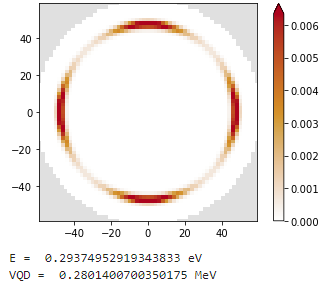

